<h2>Importing Libraries</h2>

In [1]:
import pandas as pd

<h2>Getting a numpy Matrix from the excel datasheet</h2>

In [2]:
df = pd.read_excel('dataset.xlsx')
import numpy as np
numpyMatrix = df.as_matrix()

<h2>Separating the output columns</h2>

In [3]:
HL = numpyMatrix[:,8]
CL = numpyMatrix[:,9] 
data = np.delete(numpyMatrix, 9, 1)
data = np.delete(data, 8, 1)

# Visualizing the Frequency Distribution Of HL and CL Values

In [4]:
import matplotlib.pyplot as plt

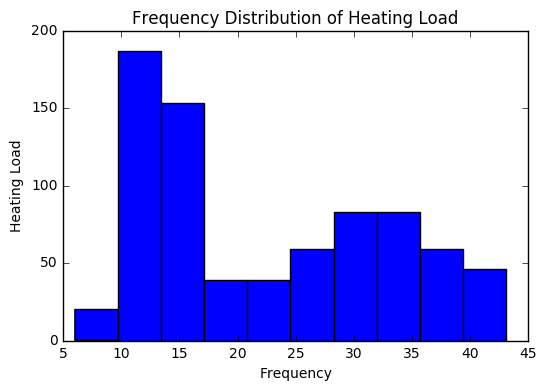

In [5]:
plt.xlabel('Frequency')
plt.ylabel('Heating Load')
plt.title('Frequency Distribution of Heating Load')
plt.hist(HL)
plt.show()

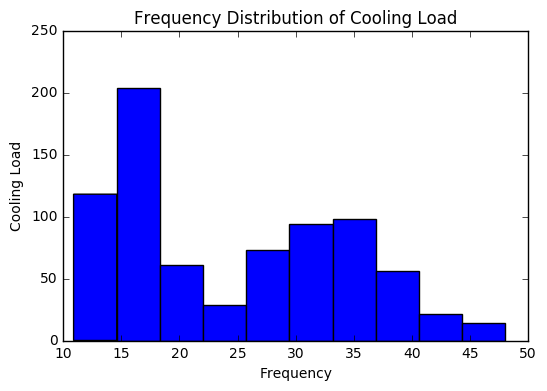

In [6]:
plt.xlabel('Frequency')
plt.ylabel('Cooling Load')
plt.title('Frequency Distribution of Cooling Load')
plt.hist(CL)
plt.show()

<h3>Visualizing Data -- How the outputs HL and CL depend on each of the input parameters</h3>

In [7]:
s = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']

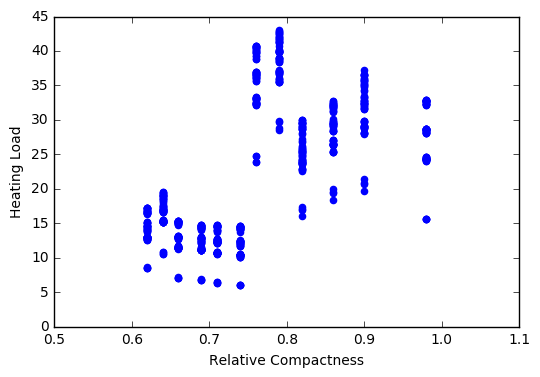

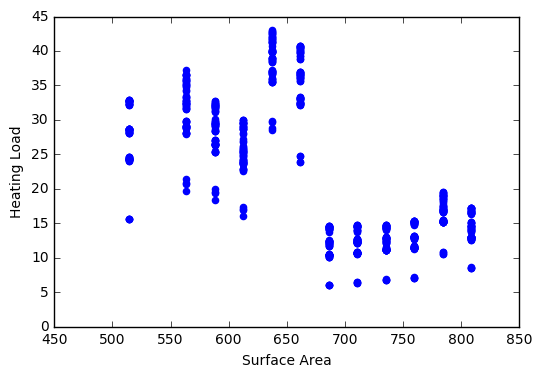

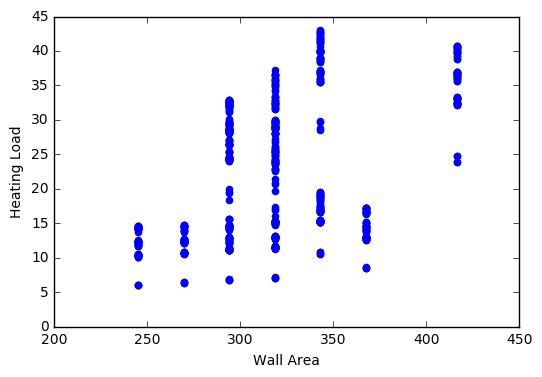

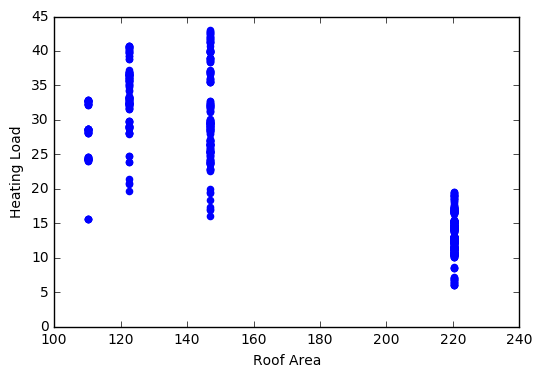

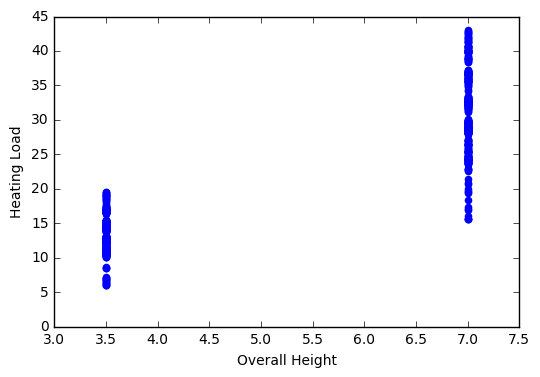

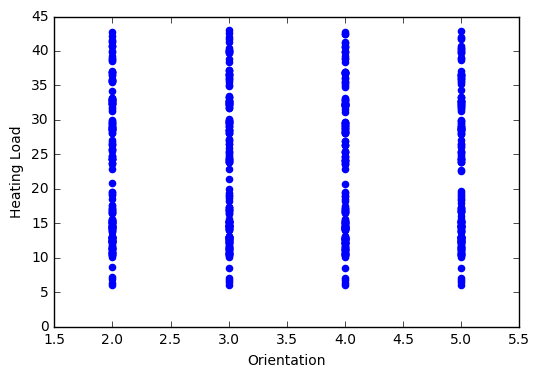

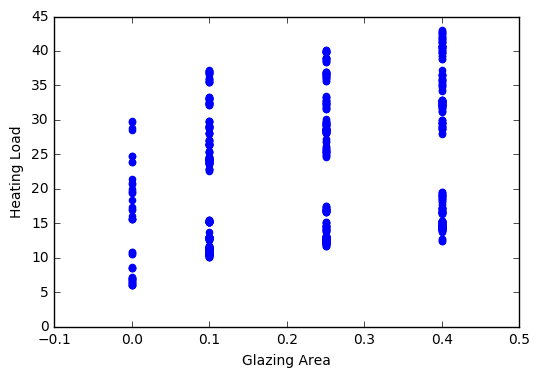

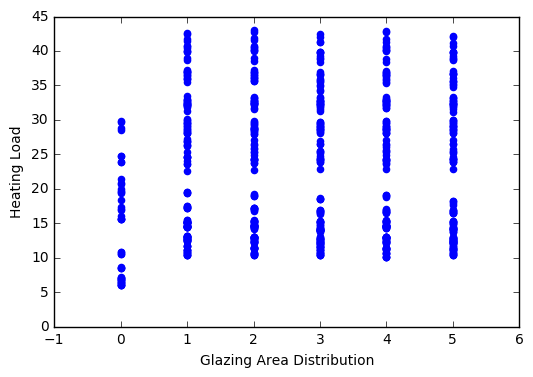

In [8]:
for i in range(8):    
    plt.xlabel(s[i])
    plt.ylabel('Heating Load')
    plt.scatter(data[:,i], HL, marker = 'o', color = 'blue')
    plt.figure(i)
    plt.show()

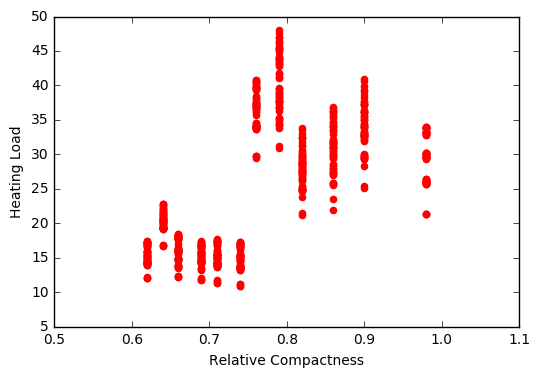

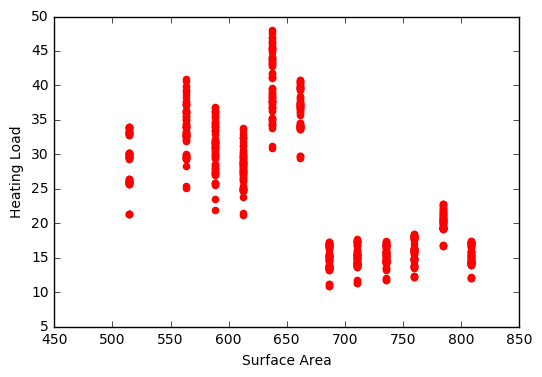

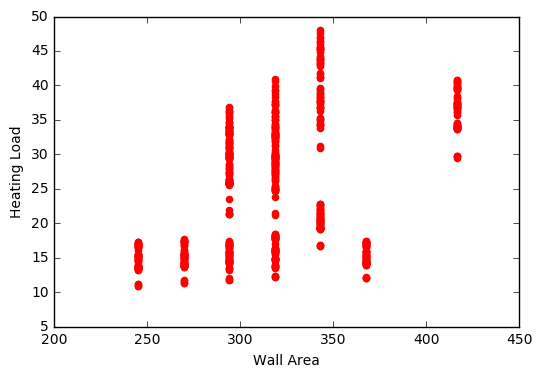

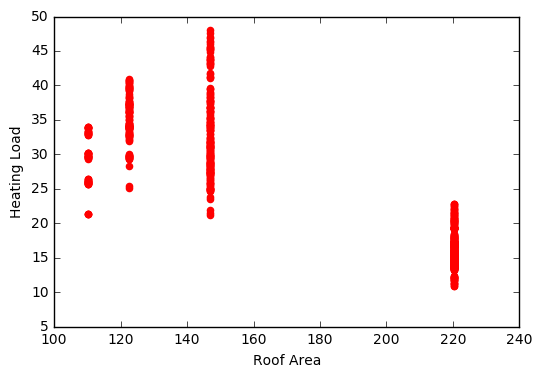

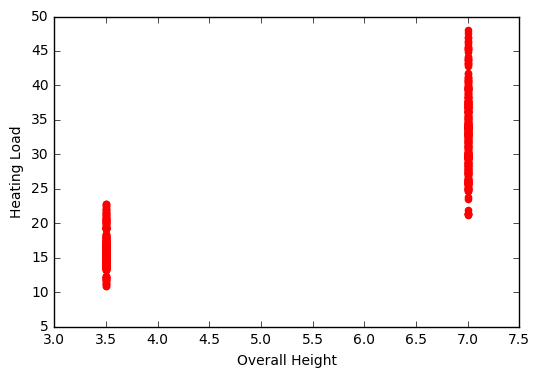

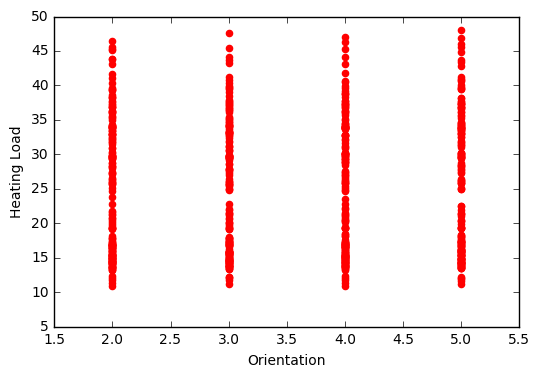

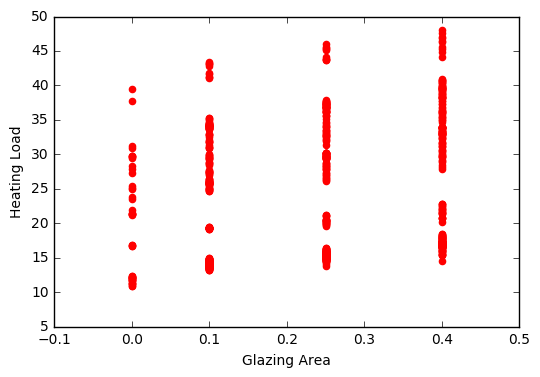

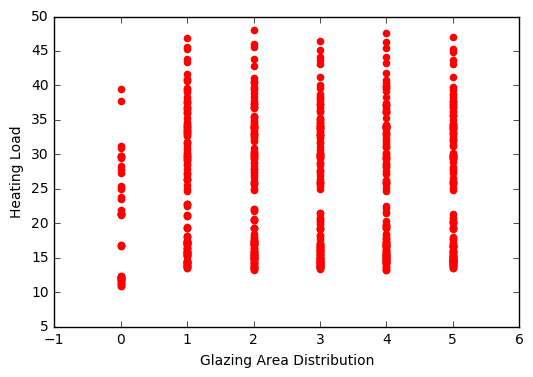

In [9]:
for i in range(8):
    plt.xlabel(s[i])
    plt.ylabel('Heating Load')
    plt.scatter(data[:,i], CL, marker = 'o', color = 'red')
    plt.figure(i)
    plt.show()

<h3>Visualizing the nature of the collected data independently by reducing it to 2-D space without considering the outputs</h3>

In [10]:
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

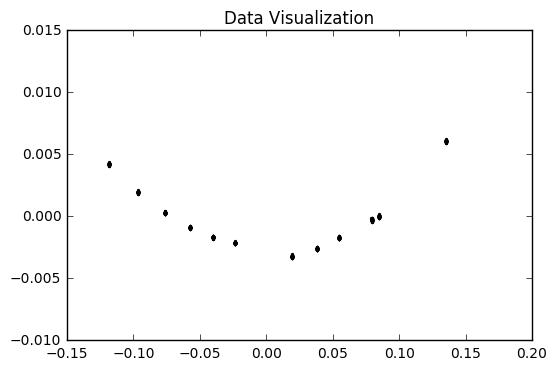

In [11]:
pca = PCA(n_components=2)
normalizer = Normalizer(copy=False)
data_norm = normalizer.fit_transform(data)
data_reduced = pca.fit_transform(data_norm)

plt.scatter(data_reduced[:,0],data_reduced[:,1], s = 1.8)
plt.title('Data Visualization')
plt.show()

It can be clearly seen that the data points are quite discrete and all the data is clusterd in 12 small portions

# Splitting the data for testing and training

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,HL,test_size=0.2,random_state=42)

<h3>Reducing the dimensions of the training data and preparing the model to visualize the results in 2-D space</h3>

In [13]:
pca = PCA(n_components=1)
normalizer = Normalizer(copy=False)
X_train_norm = normalizer.fit_transform(X_train)
data_reduced = pca.fit_transform(X_train_norm)

# Reducing the test data to 1-D

In [14]:
X_test_norm = normalizer.transform(X_test)
test_reduced = pca.transform(X_test_norm)

# TRAINING AND TESTING LINEAR REGRESSOR AND TESTING 

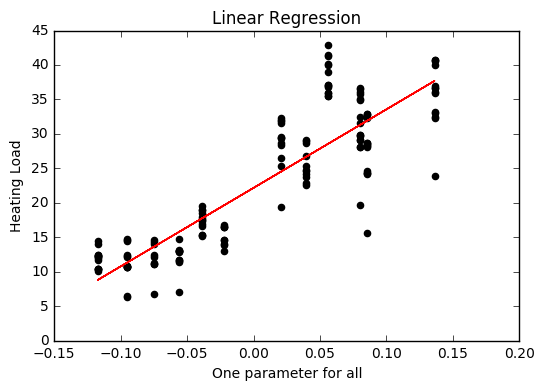

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(data_reduced, y_train)

#Applying the model on the test data
plt.xlabel('One parameter for all')
plt.ylabel('Heating Load')
plt.title('Linear Regression')
plt.scatter(test_reduced,y_test,color = 'black', marker = 'o')
plt.plot(test_reduced, regr.predict(test_reduced), color = 'red')
plt.show()

It is clear that linear regression or even polynomial regression will not be a good choice for addressing this problem

# TRAINING AND TESTING DECISION TREE REGRESSOR 

From the data, it can be inferred that decision trees can help to solve the problems

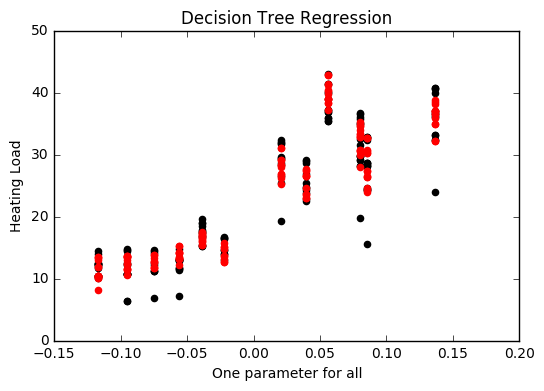

In [16]:
from sklearn.tree import DecisionTreeRegressor
regr2 = DecisionTreeRegressor(random_state=0)
regr2.fit(data_reduced, y_train)

#Applying the model on the test data
plt.xlabel('One parameter for all')
plt.ylabel('Heating Load')
plt.title('Decision Tree Regression')
plt.scatter(test_reduced,y_test,color = 'black', marker = 'o')
plt.scatter(test_reduced, regr2.predict(test_reduced), color = 'red')
plt.show()

# TRAINING AND TESTING RANDOM FOREST REGRESSOR

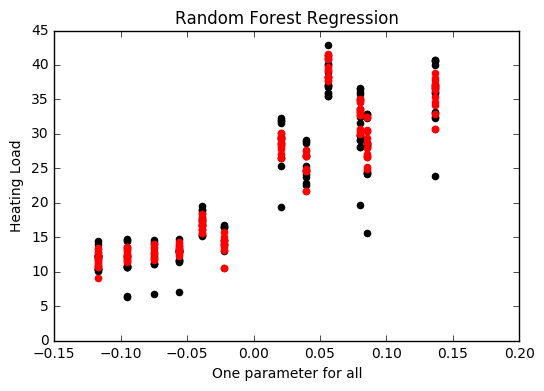

In [17]:
from sklearn.ensemble import RandomForestRegressor
regr3 = RandomForestRegressor()
regr3.fit(data_reduced,y_train)

#Applying the model on the test data
plt.xlabel('One parameter for all')
plt.ylabel('Heating Load')
plt.title('Random Forest Regression')
plt.scatter(test_reduced,y_test,color = 'black', marker = 'o')
plt.scatter(test_reduced, regr3.predict(test_reduced), color = 'red')
plt.show()

Since the Random Forest Regression didn't bring much changes in result, a single Decision tree regressor will be sufficient to address the problem and there is no need of doing much computations by selecting Random Forest Regressor

# SELECTED MODEL - DECISION TREE REGRESSOR

In [18]:
Reg_final = DecisionTreeRegressor(random_state=0)
Reg_final.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

Actual training of the model is to be done on the actual data and not the 2-D reduced data. This is because reducing the dimensions of the data, although helps in visualizing it in 2-D or 3-D space, but results in loss of some information.

# ACCURACY OF THE SELECTED MODEL ON TEST DATA

In [19]:
print(Reg_final.score(X_test,y_test))

0.995299499236
